In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Iterable
def product(l:Iterable)->int:
    x=1
    for i in l:
        x*=i
    return x

In [2]:
import pickle
import numpy as np
# with open('pkls/imgs.pkl','rb') as f:imgs=pickle.load(f)s
with open('pkls/fftresults.pkl','rb') as f:fftresults=pickle.load(f)
# with open('pkls/fftshifteds.pkl','rb') as f:fftresults=pickle.load(f)
# with open('pkls/origs.pkl','rb') as f:fftresults=pickle.load(f)
with open('pkls/outs.pkl','rb') as f:outs=pickle.load(f)

In [3]:
fftresults = np.array(fftresults)
outs = np.array(outs)
fftresults.shape, outs.shape

((5956, 103, 96), (5956,))

In [4]:
# Function to create a circular mask
def create_circle_mask(rows,cols, radius):
    center = (rows // 2, cols // 2)
    y, x = np.ogrid[:rows, :cols]
    mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    return mask.astype(float)

# Function to apply FFT and circular mask
def apply_fft_mask2fftresult(fft_images, radius):    
    # Create circular mask
    rows,cols  = fft_images.shape[-2:]
    mask = create_circle_mask(rows,cols, radius)
    
    # Apply the mask in the frequency domain
    fft_image_shifted = np.fft.fftshift(fft_images)  # Shift zero frequency component to center
    fft_image_shifted *= mask  # Multiply in the frequency domain
    
    # Inverse FFT to get the filtered image
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_image_shifted)))  # Inverse FFT with shift
    return filtered_image

In [5]:
__abs  =apply_fft_mask2fftresult(fftresults,30)
__absmin= __abs.min()
__absmax=__abs.max()
__abs_0_1=np.abs((__abs - __absmin)/ (__absmax-__absmin))
__abs_0_1_processed =np.zeros(fftresults.shape)
__abs_0_1_processed =  np.where((__abs_0_1 >= 0)&(__abs_0_1<.5), 1, __abs_0_1_processed)

In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
trainX,testX,trainY,testY = train_test_split(__abs_0_1,outs)
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)
# trainX = trainX.reshape(trainX.shape[0],trainX.shape[1]*trainX.shape[2])
# testX = testX.reshape(testX.shape[0],testX.shape[1]*testX.shape[2])

In [7]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((4467, 103, 96), (1489, 103, 96), (4467, 8), (1489, 8))

In [28]:
import tensorflow as tf ## Best Model for this lightweight
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(64,(3), activation="relu", input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(32,(3), activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(16,(3), activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(8,(3), activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ["mse","accuracy"])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
huger = tf.keras.Sequential()
huger.add(tf.keras.layers.Conv1D(256,(3), activation="tanh", input_shape=(trainX.shape[1],trainX.shape[2])))
huger.add(tf.keras.layers.MaxPooling1D(2))
huger.add(tf.keras.layers.Conv1D(128,(3), activation="tanh"))
huger.add(tf.keras.layers.MaxPooling1D(2))
huger.add(tf.keras.layers.Conv1D(64,(3), activation="tanh"))
huger.add(tf.keras.layers.MaxPooling1D(2))
huger.add(tf.keras.layers.Conv1D(32,(3), activation="tanh"))
huger.add(tf.keras.layers.MaxPooling1D(2))
huger.add(tf.keras.layers.Flatten())
huger.add(tf.keras.layers.Dense(32, activation="tanh"))
huger.add(tf.keras.layers.Dense(16, activation="tanh"))
huger.add(tf.keras.layers.Dense(8, activation="softmax"))
huger.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ["mse","accuracy"])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = model.fit(trainX,trainY,batch_size=200,epochs=100,validation_data=(testX,testY))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.1341 - loss: 2.0830 - mse: 0.1096 - val_accuracy: 0.1672 - val_loss: 2.0379 - val_mse: 0.1080
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1811 - loss: 2.0083 - mse: 0.1070 - val_accuracy: 0.2055 - val_loss: 1.9209 - val_mse: 0.1045
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2386 - loss: 1.9058 - mse: 0.1036 - val_accuracy: 0.2398 - val_loss: 1.8648 - val_mse: 0.1027
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2933 - loss: 1.8201 - mse: 0.1004 - val_accuracy: 0.2975 - val_loss: 1.7869 - val_mse: 0.0999
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3262 - loss: 1.7577 - mse: 0.0984 - val_accuracy: 0.3600 - val_loss: 1.7093 - val_mse: 0.0971
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3663 - loss: 1.6976 - mse: 0.0962 - val_accuracy: 0.3486 - val_loss: 1.6966 - val_mse: 0.0966
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 

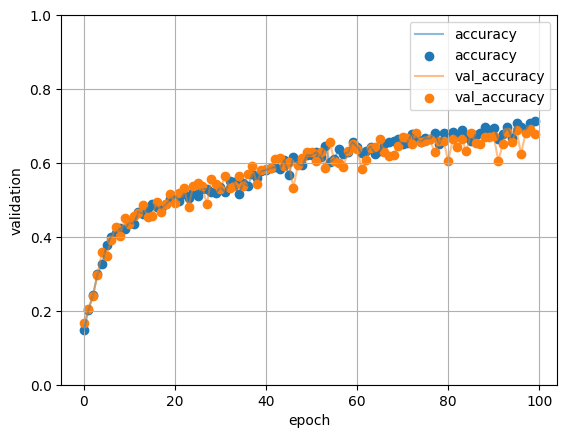

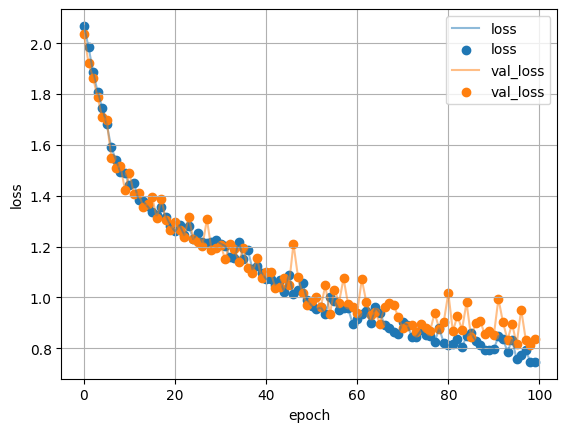

In [31]:
import matplotlib.pyplot as plt
plt.grid(visible=True,axis="both")
plt.plot(history.history['accuracy'],alpha=.5)
plt.scatter(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(history.history['val_accuracy'],alpha=.5)
plt.scatter(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.legend(["accuracy","accuracy","val_accuracy","val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("validation")
plt.ylim(top=1,bottom=0)
plt.show()
plt.grid(visible=True,axis="both")
plt.plot(history.history['loss'],alpha=.5)
plt.scatter(range(len(history.history['loss'])),history.history['loss'])
plt.plot(history.history['val_loss'],alpha=.5)
plt.scatter(range(len(history.history['val_loss'])),history.history['val_loss'])
plt.legend(["loss","loss","val_loss","val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [11]:
# import matplotlib.pyplot as plt
# x=model.layers[-1]
# for i in np.array(x.weights[0]):
#     plt.plot(i)
#     plt.show()
# plt.plot(np.array(x.weights[1]))
# plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


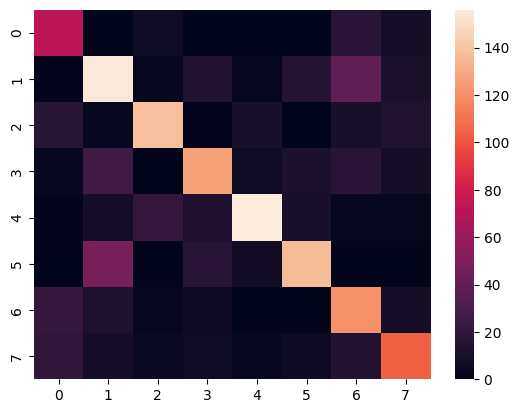

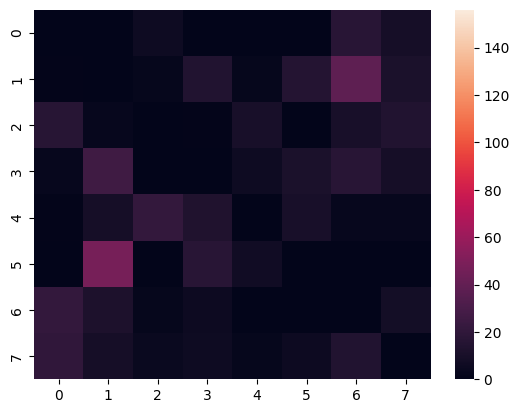

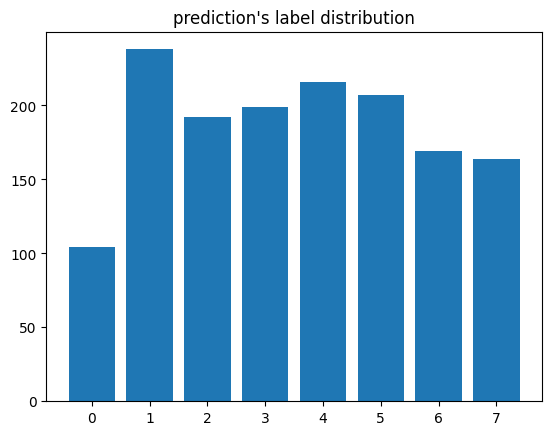

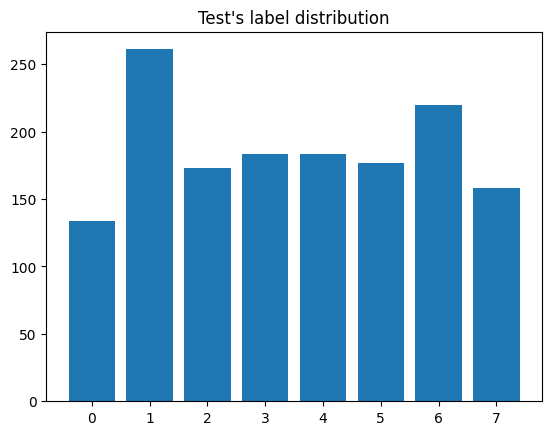

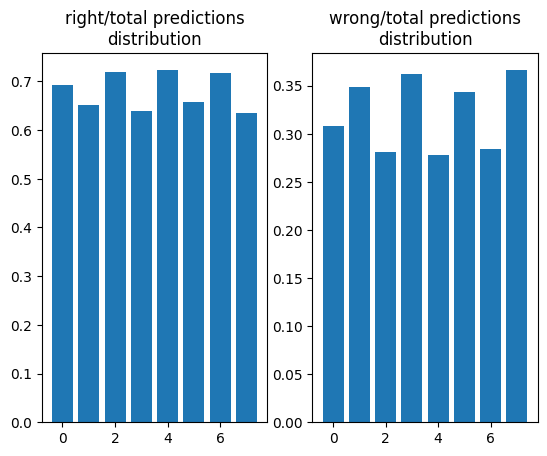

In [32]:
import seaborn as sns
predY = model.predict(testX)
correct = 0
predYmax = predY.argmax(axis=1)
testYmax = testY.argmax(axis=1)
from sklearn.metrics import confusion_matrix
cnf =confusion_matrix(predYmax,testYmax)
sns.heatmap(cnf)
plt.show()
diffcnf =(confusion_matrix(predYmax,testYmax)  )
for i in range(8):
    diffcnf[i][i]=0
sns.heatmap(diffcnf,vmax=cnf.max())
plt.show()
from typing import Counter
cntPred = Counter(predYmax)
cntTst = Counter(testYmax)
plt.title("prediction's label distribution")
plt.bar(range(8),[cntPred[i] for i in range(8)])
plt.show()
plt.title("Test's label distribution")
plt.bar(range(8),[cntTst[i] for i in range(8)])
plt.show()
plt.close()
plt.subplot(1,2,1)
plt.title("right/total predictions\ndistribution")
plt.bar(range(8),[cnf[i][i]/cntPred[i] for i in range(8)])
# plt.show()
plt.subplot(1,2,2)
plt.title("wrong/total predictions\ndistribution")
plt.bar(range(8),[sum(diffcnf[i])/cntPred[i] for i in range(8)])
plt.show()



In [13]:
Counter(predYmax)

Counter({1: 238, 6: 224, 3: 206, 2: 186, 5: 176, 4: 175, 7: 163, 0: 121})

In [14]:
model.save('model-0-1.h5')

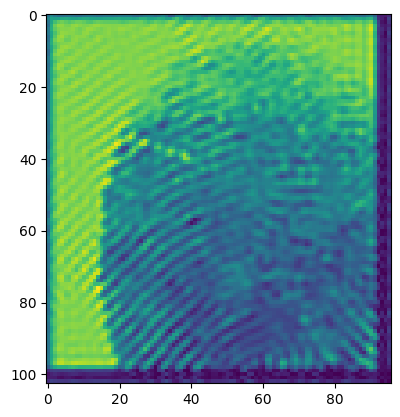

In [15]:
plt.imshow(__abs_0_1[0])

In [39]:
Counter(outs)

Counter({1: 1001, 6: 843, 3: 755, 5: 739, 2: 705, 7: 702, 4: 648, 0: 563})